# q1

In [ ]:
import numpy as np

x_train=np.load("x_train.npy")
x_test=np.load("x_test.npy")

In [ ]:
y_train=np.load("y_train.npy")
y_test=np.load("y_test.npy")

In [59]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

((10000, 28, 28), (60000, 28, 28))

In [60]:
y_train.shape

(60000,)

In [61]:
y_test.shape

(10000,)

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x1 = layers.Conv2D(filters=32, strides=1, kernel_size=3, padding="same", activation="relu")(inputs)
x2 = layers.MaxPooling2D(pool_size=2 , strides=2)(x1)
x3 = layers.Conv2D(filters=64, strides=1, kernel_size=3, padding="same", activation="relu")(x2)
x4 = layers.MaxPooling2D(pool_size=2 , strides=2)(x3)
x5 = layers.Flatten()(x4)
x6 = layers.Dense(128)(x5)
outputs = layers.Dense(10, activation="softmax")(x6)
model = keras.Model(inputs=inputs, outputs=outputs)

In [55]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [56]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 84s 44ms/step - loss: 0.6429 - accuracy: 0.9429 - val_loss: 0.0854 - val_accuracy: 0.9778
Epoch 2/5
1875/1875 [==============================] - 83s 45ms/step - loss: 0.0930 - accuracy: 0.9753 - val_loss: 0.0831 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0734 - accuracy: 0.9797 - val_loss: 0.0822 - val_accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0645 - accuracy: 0.9823 - val_loss: 0.0750 - val_accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0606 - accuracy: 0.9836 - val_loss: 0.0694 - val_accuracy: 0.9809


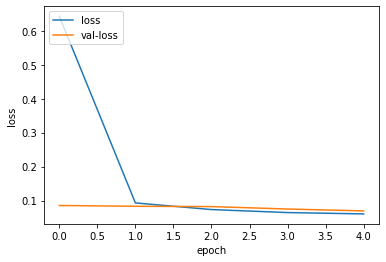

In [57]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val-loss'], loc='upper left')
plt.show()

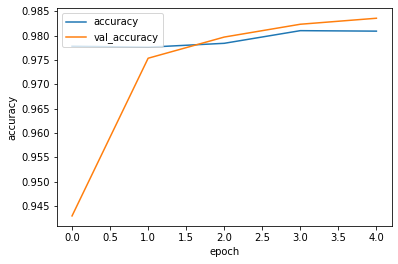

In [62]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# Activation


1)Binary Step  =  can be used as an activation function while creating a binary classifier



2)Linear  =  turns the neural network into just one layer


3)Sigmoid  =  it exists between (0 to 1)


4)Tanh  =  it produces a zero-centered output, thereby supporting the backpropagation process


5)ReLU  =  it does not activate all the neurons at the same time


6)Leaky ReLU  =  is an improved version of the ReLU activation function


7)Parameterised ReLU  =  when the leaky ReLU function still fails to solve the problem of dead neurons and the relevant information is not successfully passed to the next layer


8)Exponential Linear Unit  =  to reduce the bias shift effect


9)Swish  =  allows data normalization and leads to quicker convergence and learning of the neural network


10)Softmax  =  helps training converge more quickly than it otherwise would

# q2

### https://github.com/roboflow/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb

## از سایت بالا برای سوال ۲ استفاده کردم

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.19 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (10500/10500), done.
/content/yolov5/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
Setup complete. Using torch 1.13.1+cu116 (CPU)


In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace().project("")
dataset = project.version(2).download("yolov5")

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data={dataset.location}/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/content/yolov5/yolov5/train.py", line 640, in <module>
    main(opt)
  File "/content/yolov5/yolov5/train.py", line 504, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/yolov5/utils/general.p

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source={dataset.location}/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CPU

Traceback (most recent call last):
  File "/content/yolov5/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/yolov5/detect.py", line 98, in run
    model = DetectMultiBackend(weights, device=device, d

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")